# GPT2 文字自動生成

GPT 2 特色介紹：

1.   開源的技術架構 (模型架構)
2.   由 15 億個參數所組成 (本實作使用 8000 萬參數模型 -> GPU 運算能力限制)
3.   技術使用了大量的注意力機制 (技術擅長解決的問題：單複數、性別字詞對應)
4.   擅長應用的領域：自然語言生成、瞭解前後語意關係

演算法詳細介紹 (台大電機-李宏毅教授)：https://www.youtube.com/watch?v=ugWDIIOHtPA
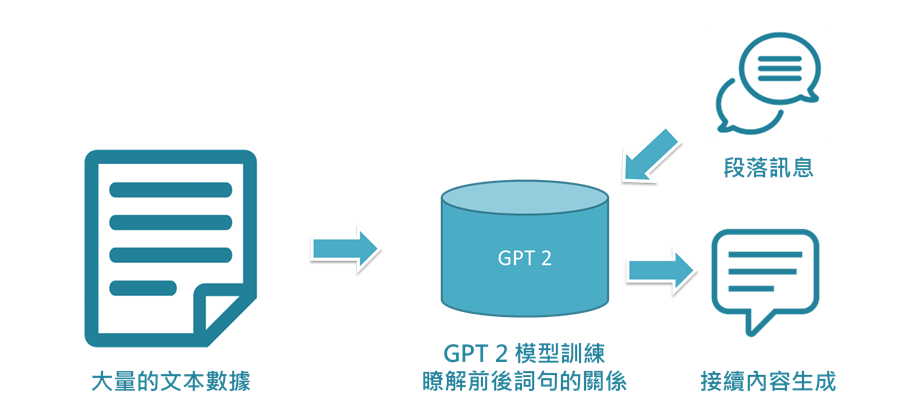

# Step 1. Notebook 設定

## (1-1) 設定 GPU 並確認被分配到的 GPU

Edit → Notebook Setting → GPU


In [ ]:
### 查看 GPU
! nvidia-smi

## (1-2) 設定與 Google Drive 做連結

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Step 2. 相關開發套件安裝

## (2-1) 下載 中文GPT-2 開發套件

使用套件：GPT2 中文版 (https://github.com/Morizeyao/GPT2-Chinese)


In [ ]:
# ### 設定儲存路徑
# import os
# os.chdir('/content/gdrive/MyDrive')
# !ls

In [2]:
### 開始下載中文 GPT-2 開發套件
!git clone https://github.com/chenkenanalytic/GPT2

Cloning into 'GPT2'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 74 (delta 17), reused 59 (delta 11), pack-reused 0
Receiving objects: 100% (74/74), 38.98 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [3]:
### 移動至所屬資料夾
import os
os.chdir('/content/GPT2')
!ls

cache		eval.py		   LICENSE	 requirements.txt  story_data.txt  train.py
config		generate.py	   README_EN.md  sample		   tokenizations   train_single.py
dream_data.zip	generate_texts.py  README.md	 scripts	   train.json	   train_v2.py


## (2-2) 安裝 Transformers 及其他開發套件

Transformers 為 Github 上開源套件，提供 Nature Language 自然語意等相關領域之開發套件。

In [4]:
#@title　安裝 transformers
from IPython.display import clear_output
!pip install transformers==4.30.2
!pip install tqdm
!pip install torchsnooper
!pip install sentencepiece
clear_output()

# Step 3. 模型訓練及資料處理

### (3-1) 建立存放 Data 之資料夾

In [5]:
### 新增 data 資料夾
!mkdir '/content/GPT2/data'

### (3-2) 解壓縮解夢資料集

In [6]:
!unzip 'dream_data.zip' -d 'data'

Archive:  dream_data.zip
  inflating: data/dream_data.txt     


### (3-3) 文字資料處理 (txt 轉 json)

In [7]:
### 讀取文字檔，以列表形式讀取
text = []
with open("/content/GPT2/story_data.txt", "r") as f:
  for line in f:
    text.append(str(line))

In [9]:
len(text)

29110

In [10]:
### 將文字列表儲存為 json 格式，命名為"train.json"
import json
with open('data/train.json', 'w') as fout:
    json.dump(text, fout)

###  ◢ (3-3) Optional 模型設定 (改模型改成 medium-level)
修改 model_config 文件 (https://huggingface.co/gpt2-medium)

### ◢ (3-4) Optional 修改 train.py  (line: 217-223)
修改訓練程式碼，避免反覆Print出訓練過程(造成過度占用暫存記憶體)

### (3-5) 開始訓練模型
※ 注意：使用 medium 模型，batch_size 需設為一，否則 GPU 記憶體不足，將無法訓練

3-5-1. 建立 token

3-5-2. 訓練模型



> 訓練程式碼範例：
> !python train.py --epochs=1 --batch_size=1 --num_pieces=100 --raw --model_config='config/model_config.json'



In [14]:
!python train_v2.py --epochs=1 --batch_size=1 --raw --num_pieces=100 --model_config='config/model_config.json'

串流輸出內容已截斷至最後 5000 行。
now time: 8:24. Step 19 of piece 15 of epoch 1, loss 5.408676624298096
now time: 8:24. Step 20 of piece 15 of epoch 1, loss 5.811512470245361
now time: 8:24. Step 21 of piece 15 of epoch 1, loss 5.674785614013672
now time: 8:24. Step 22 of piece 15 of epoch 1, loss 5.75046968460083
now time: 8:24. Step 23 of piece 15 of epoch 1, loss 5.401939868927002
now time: 8:24. Step 24 of piece 15 of epoch 1, loss 5.293851852416992
now time: 8:24. Step 25 of piece 15 of epoch 1, loss 5.15004301071167
now time: 8:24. Step 26 of piece 15 of epoch 1, loss 5.197695255279541
now time: 8:24. Step 27 of piece 15 of epoch 1, loss 5.6740899085998535
now time: 8:24. Step 28 of piece 15 of epoch 1, loss 5.120087146759033
now time: 8:24. Step 29 of piece 15 of epoch 1, loss 5.469947338104248
now time: 8:24. Step 30 of piece 15 of epoch 1, loss 5.460604667663574
now time: 8:24. Step 31 of piece 15 of epoch 1, loss 6.518029689788818
now time: 8:24. Step 32 of piece 15 of epoch 1, loss 5.69

# Step 4. 文字生成

In [15]:
!python generate.py --length=50 --nsamples=3 --prefix='夢見老虎' --model_path='model/final_model'

args:
Namespace(device='0,1,2,3', length=50, batch_size=1, nsamples=3, temperature=1, topk=8, topp=0, model_config='config/model_config_small.json', tokenizer_path='cache/vocab_small.txt', model_path='model/final_model', prefix='夢見老虎', no_wordpiece=False, segment=False, fast_pattern=False, save_samples=False, save_samples_path='.', repetition_penalty=1.0)
100% 50/50 [00:01<00:00, 29.11it/s]
======================================== SAMPLE 1 ========================================

夢見老虎的時間在我們是一個字的人的那些事我的人生命我們都已經的那些事都是我們是不會有時我們的是在我們是我們是
100% 50/50 [00:00<00:00, 70.53it/s]
======================================== SAMPLE 2 ========================================

夢見老虎子我不再沒有些話不再也不再也不再有一點都是不知道的時候你是不知道我只是我也許會想起來就能不再見到你就
100% 50/50 [00:00<00:00, 64.81it/s]
======================================== SAMPLE 3 ========================================

夢見老虎的心的我我的人我想我的時候想要說我我是我會是一直到這樣一個我說的一個人我不會我的不是我的話我不會在我
